In [10]:
%matplotlib inline
import p1
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Basic Image Processing

Let's first read an image in and see how it looks!

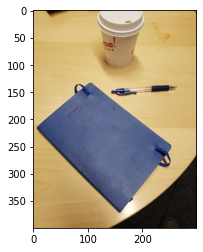

In [11]:
img = p1.imread('img.jpg')
plt.imshow(img)

## Filtering

Let's convolve with Gaussians of two different standard deviations and see what that gives us!

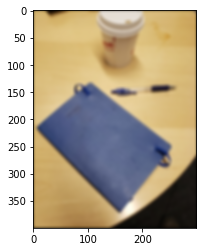

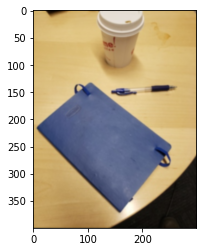

In [12]:
filt1 = p1.gaussian_filter(11,3)
filt2 = p1.gaussian_filter(11,1)
gaussian_filtered1 = p1.convolve(img, filt1)
gaussian_filtered2 = p1.convolve(img, filt2)
plt.figure(); plt.imshow(gaussian_filtered1)
plt.figure(); plt.imshow(gaussian_filtered2)

## Image gradients

Let's now compute image gradients and visualize the gradient magnitude.

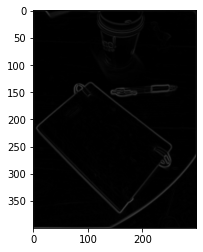

In [13]:
gradmag, gradori = p1.gradient(img)
plt.figure(); plt.imshow(gradmag, cmap = plt.get_cmap('gray'), vmax = 1)

We can threshold the gradient image to get pixels on the boundary. We can even try to find all pixels with gradient orientation between 30 degrees and 90 degrees.

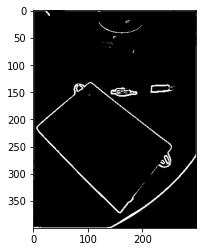

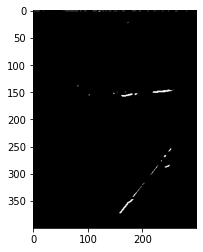

In [14]:
plt.figure(); plt.imshow(gradmag>0.1, cmap=plt.get_cmap('gray'))
plt.figure(); plt.imshow((gradmag>0.1) & (gradori>np.pi/6) & (gradori<np.pi/2), cmap = plt.get_cmap('gray'))

# Part 2: Line detection

Now let's look for lines! We want to find the equation of every line in the image.
Any line is parametrized by $\theta$ and $c$, with the equation of the line given by:
$$x \cos \theta + y \sin \theta + c = 0$$
To detect lines, we will first define the set of possible values of $\theta$ and $c$.

In [15]:
thetas = np.arange(-np.pi-np.pi/40, np.pi+np.pi/40, np.pi/40)
imgdiagonal = np.sqrt(img.shape[0]**2 + img.shape[1]**2)
cs = np.arange(-imgdiagonal, imgdiagonal, 0.5)

Next we will do Hough voting. Let's look at what the votes look like!

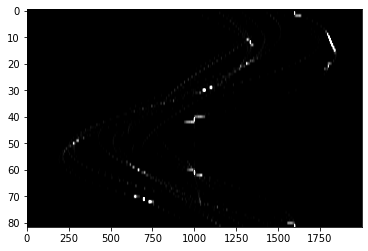

In [16]:
votes = p1.hough_voting(gradmag, gradori, thetas, cs, 0.1, 0.5, np.pi/40)
plt.figure(); plt.imshow(votes, aspect='auto', cmap=plt.get_cmap('gray'), vmax=20) # type: ignore

Next let's find local maxima in this Hough transform, get the equations of the lines and draw the lines!

-1.00x + -0.00y + 298.00 = 0
-1.00x + -0.00y + 299.00 = 0
-0.81x + -0.59y + 396.50 = 0
-0.76x + -0.65y + 400.00 = 0
-0.76x + -0.65y + 400.50 = 0
-0.71x + -0.71y + 156.00 = 0
-0.71x + -0.71y + 156.50 = 0
-0.71x + -0.71y + 403.50 = 0
-0.71x + -0.71y + 404.00 = 0
-0.65x + -0.76y + 165.50 = 0
-0.65x + -0.76y + 166.00 = 0
-0.65x + -0.76y + 166.50 = 0
-0.65x + -0.76y + 167.00 = 0
-0.08x + -1.00y + 154.50 = 0
-0.08x + -1.00y + 155.00 = 0
0.00x + -1.00y + 399.00 = 0
0.59x + -0.81y + 46.00 = 0
0.59x + -0.81y + 46.50 = 0
0.59x + -0.81y + 47.00 = 0
0.59x + -0.81y + 47.50 = 0
0.59x + -0.81y + 48.00 = 0
0.59x + -0.81y + 50.50 = 0
0.59x + -0.81y + 51.00 = 0
0.65x + -0.76y + 25.00 = 0
0.65x + -0.76y + 25.50 = 0
0.65x + -0.76y + 26.00 = 0
0.65x + -0.76y + 26.50 = 0
0.65x + -0.76y + 27.00 = 0
0.65x + -0.76y + 30.00 = 0
0.65x + -0.76y + 30.50 = 0
0.65x + -0.76y + 31.00 = 0
1.00x + 0.00y + -1.00 = 0
1.00x + 0.00y + 0.00 = 0
0.81x + 0.59y + -348.50 = 0
0.81x + 0.59y + -348.00 = 0
0.76x + 0.65y + -361.50 =

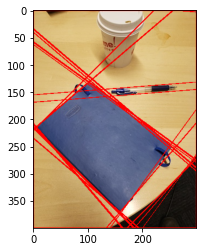

In [17]:

lines = p1.localmax(votes, thetas, cs, 20, 11)
for (theta, c) in lines:
    print('{:.02f}x + {:.02f}y + {:.02f} = 0'.format(np.cos(theta), np.sin(theta), c))


newimg = p1.draw_lines(img, lines, 0.5)
plt.imshow(newimg)


Another example!

In [18]:
img = p1.imread('img2.png')
plt.figure(); plt.imshow(img)
gradmag, gradori = p1.gradient(img)
votes = p1.hough_voting(gradmag, gradori, thetas, cs, 0.1, 0.5, np.pi/40)
lines = p1.localmax(votes, thetas, cs, 20, 11)
for (theta, c) in lines:
    print('{:.02f}x + {:.02f}y + {:.02f} = 0'.format(np.cos(theta), np.sin(theta), c))



newimg = p1.draw_lines(img, lines, 0.5)
plt.figure();plt.imshow(newimg)
